In [1]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

In [2]:
import jax.numpy as jnp
jnp.ones(1)

Array([1.], dtype=float32)

In [3]:
from copy import deepcopy

import jax
import optax
import numpy as np
from sklearn.model_selection import ParameterGrid

from utils import grid_script
from config import default_precorrector_gnn_config
from experiments.script_gnn_prec import script_gnn_prec

In [4]:
seed = 42
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/'
folder = 'results_cases/28.03_final_elliptic_grid400_precor_gnn'

In [5]:
data_config = {
    'data_dir': path,
    'pde': np.nan,
    'grid': np.nan,
    'variance': np.nan,
    'lhs_type': np.nan,
    'N_samples_train': 1000,
    'N_samples_test': 200,
    'fill_factor': 1,
    'threshold': 1e-4
}

train_config = {
    'model_type': 'precorrector_gnn',
    'loss_type': np.nan,
    'batch_size': 8,
    'optimizer': optax.adam,
    'lr': 1e-3,
    'optim_params': {},
    'epoch_num': 500
}

base_config = {
    'path': path,
    'folder_model': folder,
    'folder_log': folder,
    'name': np.nan,
    'model_use': np.nan,
    'save_model': True,
    'cg_maxiter': np.nan,
    'cg_atol': np.nan,
    'data_config': data_config,
    'model_config': np.nan,
    'train_config': train_config,
    'seed': seed
}

# Div-k-grad

In [ ]:
notstatic_precorrector_gnn_config = deepcopy(default_precorrector_gnn_config)
notstatic_precorrector_gnn_config['static_diag'] = True
notstatic_precorrector_gnn_config['mp']['aggregate_edges'] = 'sum'
base_config['model_config'] = notstatic_precorrector_gnn_config

params_grid = ParameterGrid({
    'model_use': ['train'],
    'cg_maxiter': [500],
    'cg_atol': [1e-12],
    'model_type': ['precorrector_gnn'],
    'loss_type': ['low_freq_loss'],
    'batch_size': [8],
    'lr': [1e-3],
    'epoch_num': [500],
    'pde': ['div_k_grad'],
    'grid': [400],
    'variance': [.5],
    'lhs_type': ['l_ic0'],
    'fill_factor': [1],
    'threshold': [1e-4]
})

# with jax.disable_jit():
grid_script(script_gnn_prec, base_config, params_grid)

[INFO | root | 2025-03-31 18:20:52] - %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[INFO | root | 2025-03-31 18:20:52] - [GNN precs] script `rjlvwh` started execution.
[INFO | root | 2025-03-31 18:20:52] - Config: {'path': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'folder_model': 'results_cases/28.03_final_elliptic_grid400_precor_gnn', 'folder_log': 'results_cases/28.03_final_elliptic_grid400_precor_gnn', 'name': 'rjlvwh', 'model_use': 'train', 'save_model': True, 'cg_maxiter': 500, 'cg_atol': 1e-12, 'data_config': {'data_dir': '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/', 'pde': 'div_k_grad', 'grid': 400, 'variance': 0.5, 'lhs_type': 'l_ic0', 'N_samples_train': 1000, 'N_samples_test': 200, 'fill_factor': 1, 'threshold': 0.0001}, 'model_config': {'layer_type': 'Conv1d', 'use_nodes': False, 'node_upd_mlp': False, 'static_diag': True, 'alpha': 0.0, 'edge_enc': {'features': [1, 16, 16], 'N_layers': 2}, 'edge_dec': {'features': [16, 16, 1], 'N_lay

Started: 0


[INFO | root | 2025-03-31 18:22:09] - Data is loaded in 7.686e+01 sec.



In [ ]:
# exit()

In [ ]:
2+3

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases/28.03_final_elliptic_grid400_precor_gnn/rjlvwh/losses_rjlvwh.npz'
f = np.load(path)


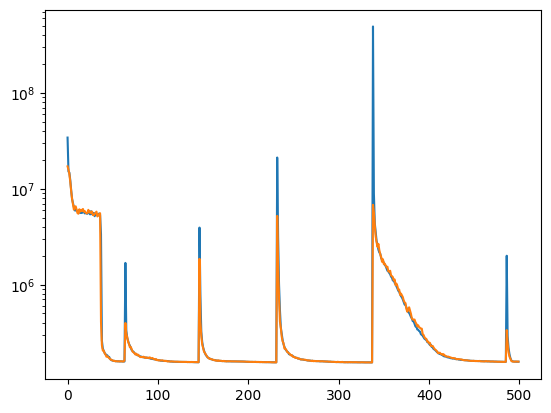

In [9]:
plt.plot(range(len(f['train_loss'])), f['train_loss'], label='train')
plt.plot(range(len(f['test_loss'])), f['test_loss'], label='test')
plt.yscale('log')

In [ ]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases/23.01_elliptic_grid256_ablation_precor_gnn/7zc13x/losses_7zc13x.npz'
f = np.load(path)

In [ ]:
plt.plot(range(len(f['train_loss'])), f['train_loss'], label='train')
plt.plot(range(len(f['test_loss'])), f['test_loss'], label='test')
plt.yscale('log')